2024-06-12 10:33:51.676 
  command:

    streamlit run /usr/lib/python3/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

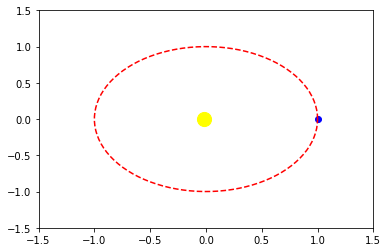

In [2]:
import streamlit as st
import streamlit.components.v1 as components
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math


# Constants
a = 1.0  
e = 0.0167
b = math.sqrt(1 - a**2*e**2)  # 0.5  # Semi-minor axis of Earth's orbit
theta = np.linspace(0, 2*np.pi, 100)  # Angle values for one orbit


def calculate_position(frame):
    x = a * np.cos(theta[frame])
    y = b * np.sin(theta[frame])
    return x, y

def update2(frame):
    x, y = calculate_position(frame)
    scatter.set_offsets(np.c_[x, y])
    line.set_data(a * np.cos(theta[:frame+1]), b * np.sin(theta[:frame+1]))
    return scatter,

fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

scatter = ax.scatter([], [], color='blue')
sun = ax.scatter([0-e], [0], color='yellow', s=200)
line, = ax.plot([], [], '--', color='red')

def init():
    scatter.set_offsets([])
    return scatter,


ani = FuncAnimation(fig, update2, frames=len(theta), blit=True)

# salva a animação num arquivo html
with open("myvideo2.html", "w") as fname:
  print(ani.to_jshtml(), file=fname)

# abre o arquivo de animação
with open("myvideo2.html", "r") as fname:
    source_code = fname.read()

components.html(source_code, height=900, width=900)